# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [0]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [0]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [0]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [0]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
#建立模型

In [0]:
model=Sequential()

In [0]:
model.add(Dense(units=256,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'
               ))

In [0]:
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'
               ))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# 訓練模型

In [19]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

W0714 09:57:28.928707 139905859868544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0714 09:57:28.953350 139905859868544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [20]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

W0714 09:57:29.543540 139905859868544 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0714 09:57:29.593925 139905859868544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 126us/step - loss: 0.2704 - acc: 0.9227 - val_loss: 0.1331 - val_acc: 0.9623
Epoch 2/10
48000/48000 [==============================] - 5s 99us/step - loss: 0.1094 - acc: 0.9676 - val_loss: 0.0996 - val_acc: 0.9702
Epoch 3/10
48000/48000 [==============================] - 5s 94us/step - loss: 0.0698 - acc: 0.9785 - val_loss: 0.0872 - val_acc: 0.9739
Epoch 4/10
48000/48000 [==============================] - 5s 94us/step - loss: 0.0485 - acc: 0.9847 - val_loss: 0.0870 - val_acc: 0.9723
Epoch 5/10
48000/48000 [==============================] - 5s 97us/step - loss: 0.0359 - acc: 0.9887 - val_loss: 0.0803 - val_acc: 0.9737
Epoch 6/10
48000/48000 [==============================] - 5s 95us/step - loss: 0.0270 - acc: 0.9915 - val_loss: 0.0938 - val_acc: 0.9749
Epoch 7/10
48000/48000 [==============================] - 5s 95us/step - loss: 0.0204 - acc: 0.9936 - val_loss: 0.0796 - val_ac

# 以圖形顯示訓練過程

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

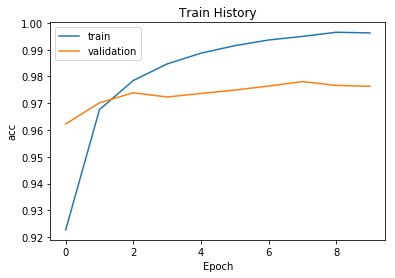

In [22]:
show_train_history(train_history,'acc','val_acc')

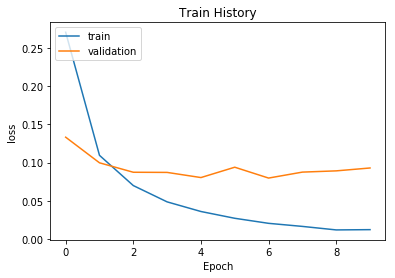

In [23]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [24]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 34us/step

accuracy= 0.9787
